##**ANÁLISIS DE SENTIMIENTOS COMENTARIOS**

## Filtrar la base de datos

 1. Importamos las librerías para poder importar la data

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Importamos el archivo business

In [ ]:
# Leemos el documento "business" en formato parquet.
business = pd.read_parquet('/content/drive/MyDrive/Final Project /business.parquet')

In [ ]:
business.sample(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
133610,lC9loud_H6q7WtPxJaMwkg,Simply Southern Soul Food,"2940 E 38th St, Ste F",Indianapolis,PA,46218,39.826393,-86.112772,3.0,23,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Soul Food, Barbeque","{'Friday': '7:0-19:0', 'Monday': None, 'Saturd..."
62841,nLncl2uk7lvJg-CCvuwQIg,Off The Wagon Tours - Nashville Party Wagon,533 Lafayette St,Nashville,PA,37203,36.152652,-86.775002,4.5,75,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Beer Tours, Adult Entertainment, Nightlife, Pa...","{'Friday': '11:0-23:0', 'Monday': '0:0-0:0', '..."


3. Filtrar la data con las categorías "steakhouses"

In [ ]:
# Realizamos una máscara para obtener los Id's de los resturantes con la categoría "steakhouses".
mask_id = business['categories'].str.contains('steakhouses', case=False) == True
# Guardamos la máscara en la variable "steakhouses" para plicarlo posteriormente.
steakhouses = business[mask_id][['business_id']]

4. Aplicamos el filtro al archivo review

In [ ]:
# Leemos el documento "review" en formato parquet.
review = pd.read_parquet('/content/drive/MyDrive/Final Project /review.parquet')

In [ ]:
# Revisamos el archivo
review.sample(2)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
4400001,1GjRAjZY9jwOBKu7vDibvg,pDaw5rYCJElIvWaCk23tdw,XbQhPllLz2CaaAFJYyBVjQ,5.0,1,0,0,I highly recommend VCA in Tucson. We have 3 do...,2009-09-13 20:21:50
3388539,7CDl7XdctgZ-ma9fXgTGXA,hv2VFkaZpwdVSl-VdNfitw,fYSaoJMOj7-r4XWEuYjRxw,4.0,2,1,1,Every time I've been here I've had a great tim...,2009-02-24 14:19:27


In [ ]:
# Realizamos una máscara de los Id's de los resturantes con la categoría "steakhouses" para la columna business_id en chekin.
mask_review = review['business_id'].isin(steakhouses['business_id'])
# Aplicamos la máscara en chekin.
review = review[mask_review]

In [ ]:
# Revisamos el archivo
review.sample(2)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
5855092,gRUudpB1rCKLBJgK07crog,uE_Io2hUd9USgyEZ0-b5XQ,ckF4SrqKfSm8ndr88on1dA,1.0,0,1,0,Food was TERRIBLE. I sent back my entree TWICE...,2009-05-06 15:00:51
4952857,tHaB4kH-Iat5DEIxifvp_A,4HdArh7ETM2WUlzxJQiBug,ReV4Q3rEJ8neicQPc6pC0w,5.0,1,0,1,This has to be one of the top steak places in ...,2006-09-06 06:26:19


5. Reseteamos el índice del archivo

In [ ]:
# Reseteamos el índice
review = review.reset_index(drop=True)

6. Visualizamos el archivo

In [ ]:
# Se utiliza head para ver 5 datos primeros de la data.
review.head(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,rGI8UdsEGiGeETFiu1VK1w,WJnyWEe_YK7JO47fcovBVw,hRHhP3fhMy3LktPyQa3s_A,3.0,0,0,0,Good choice in Union Station St. Louis. I had...,2008-08-20 08:07:02
1,qXT9LQRf0j2tE-rEruWCCw,c9-jEIfBnLa4iNHxVmXAHA,V9XlikTxq0My4gE8LULsjw,4.0,0,0,0,What what???\n\nI've seen these all over the c...,2008-08-18 10:56:39
2,rzrBiijeQh7ubjfRCr-UtA,Kj-u8Yq1d3mLKitWsDAxpg,YtSqYv1Q_pOltsVPSx54SA,4.0,12,11,11,"A very upscale and respected chain, with a sho...",2008-04-30 15:26:12
3,LFjBP5cFaeVo1bBMlpYaeA,ocSmiCHL5R9bBZTBmk_ryQ,U0ICWpbd1C0GD9SpIv3bSA,3.0,1,0,0,This place is okay as long as you know what to...,2009-10-16 01:35:54
4,94hSTwcWkbuN6tVzKRcMCw,CNB1WsGa5mO4DmMeJ7O1Cw,1P_mGUY1PyPq7_ZabrzpBw,3.0,0,0,1,Eh. \n\nVisited Carmine's on a weekend trip to...,2008-04-29 04:05:43


In [ ]:
# Se usa .info para saber los tipos de datos y si hay nulos.
review.info()
# No hay nulos en el data frame "review"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4543 entries, 0 to 4542
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    4543 non-null   object        
 1   user_id      4543 non-null   object        
 2   business_id  4543 non-null   object        
 3   stars        4543 non-null   float64       
 4   useful       4543 non-null   int64         
 5   funny        4543 non-null   int64         
 6   cool         4543 non-null   int64         
 7   text         4543 non-null   object        
 8   date         4543 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 319.6+ KB



7.Se utilizará la columna 'text' para analizar y predecir si el resultado podría ser positivo o negativo. Se utilizará la biblioteca langdetect.
Esta biblioteca permite detectar automáticamente el idioma de un texto dado.

In [ ]:
#Se instala la librería langdetect con pip install.
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=9e63cabf6af3a61cd0c3faa6376cbf1c20673de3a68e62e8bc350327703e9684
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


8. Se importa la función 'detect' desde la biblioteca langdetect para detectar el idioma deseado de un texto.

In [ ]:
from langdetect import detect

9. Se realiza una función para detectar las palabras en inglés y que eliminen las que no.

In [ ]:

def es_ingles(palabra): # Toma como parámetro una palabra y devuelve un valor booleano (V o F) sabiendo si es palabra en español e inglés.
    if not palabra:
        return False # Si la palabra está vacía o nula devuelve 'False'.
    try:
        idioma = detect(palabra)
        return idioma == 'en' # Si el idioma es inglés devuelve 'True'.
    except:
        return False  # Si la palabra tiene un error o no se procesa correctamente devuelve 'False'.

10. Se aplica la función en la base de datos y las palabras que no sean en inglés las reemplaza con '|'

In [ ]:
# Eliminamos las palabras que no sean inglés
review['text'] = review['text'].apply(lambda palabra: '|' if not es_ingles(palabra) else palabra)

In [ ]:
# Revisamos el archivo
review.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
237,A3nVnrXjMEMf9iIm4DVwRg,79FSS85liZ_sfaAoaws08Q,-eLCHvtz99fc985UNL1rTA,3.0,1,0,1,"Yes it is a chain, but for a fast cheap steak ...",2009-07-05 15:18:28
892,nSnuRcTWoUkOwyeHRl2ANQ,-1_hWlxJbX-H-GbCJ0mgsQ,GHjPGnECnM-UIj0DIYOkHg,2.0,11,2,3,"Locally, Homestead Inn is better known as Chic...",2009-07-02 12:06:43
1704,TGQsildAjPdWZ1YP5NSkfA,nLw0QGZIs-nJYoXOEx6P9A,wbDRmtxaKRpBOjutvV6TEA,2.0,6,0,1,i don't know if my expectations were too high ...,2008-11-14 20:02:16
1779,Wi4BN9A-JIyfEgLfnE7K_g,S-P2haI61umZRkGPCWrqfA,OiEsbS3bLm1gXK7k9kBu1Q,4.0,7,0,2,We recently were taken to Sam's Steakhouse for...,2008-07-06 02:01:43
115,t6s0txOnkryWGqR3QOCJtA,O6UEfvgOhvZr0pHIDeDydA,V9XlikTxq0My4gE8LULsjw,3.0,0,2,0,"sad to say, celebrated my 29th bday here. okay...",2007-01-10 05:28:37


11. Eliminamos las filas que tienen el símbolo '|'.

In [ ]:
review= review[review['text'] != '|']

12. Se observa si hay nulos y la cantidad de datos finales a utilizar

In [ ]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4538 entries, 0 to 4542
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    4538 non-null   object        
 1   user_id      4538 non-null   object        
 2   business_id  4538 non-null   object        
 3   stars        4538 non-null   float64       
 4   useful       4538 non-null   int64         
 5   funny        4538 non-null   int64         
 6   cool         4538 non-null   int64         
 7   text         4538 non-null   object        
 8   date         4538 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 354.5+ KB


13. Se comprueba que no hay datos en el campo texto con el símbolo '|'.

In [ ]:
review.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
713,D3ESVAJ9QlDt_KdP4n3yow,3zWYE-sXRgbT6pHzGo8LNw,cGX-1IUwXOjkUqZbkKYcjw,5.0,2,0,1,i hope you're a big eater coming here. nothin...,2008-11-10 03:58:18
2555,bxIoQVD6A77WXnGXC09THg,DBpcvcKAYaf_JLH4gp_EZA,Qh-vuXF2kEVvj1ReRP_ztA,4.0,2,0,0,I've been to Texas Roadhouse 8 times since it ...,2009-09-06 05:35:02
2795,BGuNxNrNTKAJn2O-0b1wpQ,GqzoKYXv6F1O85bhywyoSA,EjgQxDOUS-GFLsNxoEFJJg,5.0,3,0,2,the first time I had a PHILLY cheese steak in ...,2008-10-21 15:38:21
1691,6FfFc7OQ3kxQdgZxymSFYg,mKBaaQMW5NYRkh9uLEe_SA,IkY2ticzHEn4QFn8hQLSWg,3.0,1,0,1,"Pretty decent tasting cheesesteak, but I would...",2008-11-10 02:03:57
2012,e0bfQ22HrlAXZIM0GIh-Xw,jYicbePQfobDOMQM5JW-LQ,CoZ2mpsMBP8HUG1ymKoZTg,5.0,1,1,1,Opal was one of those places that is just your...,2007-06-22 05:39:44


## Ver la disperción de los datos

1. Se instala la librería 'wordcloud' para poder visualizar las palabras repetidas.

In [ ]:
!pip install wordcloud

2. Se Importa WordCloud

In [ ]:
from wordcloud import WordCloud

3. Se crea una variable text de la columna del dataframe para la visualización.

In [ ]:
comentarios=review['text']

4. Se usa WordCloud para la visualización de nube de palabras en una variable.

In [ ]:
wordcloud = WordCloud(background_color="white", colormap='Dark2', max_font_size=150, random_state=42).generate(str(comentarios))

5. Se importa matplotlib.pyplot para graficar.

In [ ]:
import matplotlib.pyplot as plt

6. Se carga la gráfica para poder observar las palabras repetidas.

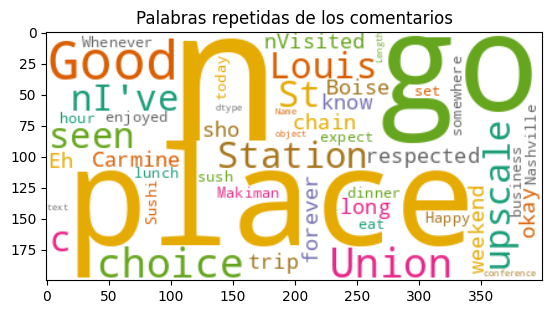

In [ ]:
plt.imshow(wordcloud,interpolation='bilinear')
plt.title ('Palabras repetidas de los comentarios')
plt.show()

## Categorizar el texto

1. Se instala el paquete 'nltk' de Natural Language Toolkit que procesa el leguaje natural.

In [ ]:
!pip install --user nltk

2. Se importa 'nltk' para usar los recursos del paquete instalado.

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize
nltk.download('vader_lexicon') # Descarga vader_lexicon para el análisis de sentimientos.
nltk.download('punkt') # Descarga punkt, un modelo de toquenización que divide el texto en palabras individuales

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

3. Se crea una valiable para que inicie el analizador de sentimientos VADER.

In [ ]:
analizador = SentimentIntensityAnalyzer()

4. Se crea una función para obtener el puntaje del sentimiento entre los valores (1 y -1), donde 1 es positivo y -1 es negativo.


In [ ]:
def Puntaje_Sentimiento(text):
    tokens = word_tokenize(text)  # Tokenizar el texto
    scores = analizador.polarity_scores(text)  # Obtener los puntajes de sentimiento
    return scores['compound']  # Retornar el puntaje compuesto

5. Se aplica la función 'Puntaje_Sentimiento' en el dataframe.

In [ ]:
review['score_sentimientos'] = review['text'].apply(Puntaje_Sentimiento)

6. Se comprueba si está la columna 'score_sentimientos'.

In [ ]:
review.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,score_sentimientos
1067,-aM-uFEMmbWjtu-Ueth1UA,GSsQ_AybkmJvT-PDh1Fchg,EDIDMgOAz6AhDzCtPqehNg,5.0,1,1,0,The food & drink were excellent! We started o...,2009-05-24 21:24:39,0.9994
147,AnJkhW4343LVELjpNW6mnA,0yYCMhDWCEIVUyZLzDWwqQ,YtSqYv1Q_pOltsVPSx54SA,2.0,2,3,1,"Begin the riots, but I'll argue with anyone (i...",2007-02-23 22:02:16,0.9799
1599,faMWdNfVFUpFBEwCdn9VcQ,3YVCaCCyOaxAikH3NYB7ug,wbDRmtxaKRpBOjutvV6TEA,5.0,2,0,2,Well where do I begin. I started with a Macall...,2007-10-09 13:37:07,0.9724
1676,bHFHHLL6XaT_sHQUJ1jVuQ,AvfMaqcH21JUBbb23ZjRYg,IkY2ticzHEn4QFn8hQLSWg,5.0,3,2,2,Geno's - Pat's what's the difference. I grew u...,2007-09-18 20:12:01,0.4588
700,ILemlHAoYllD80jcJ5fBFA,SeDNP2O8zsbJYp-M_kY5TQ,94uNSVqA4L4BAy4x1PQX0A,1.0,4,12,3,We went to Moritomo for Valentine's Day dinner...,2008-05-07 14:03:14,-0.7761


In [ ]:
review.describe()

,stars,useful,funny,cool,score_sentimientos
count,4538.000000,4538.000000,4538.000000,4538.00000,4538.000000
mean,3.631776,1.749890,0.849273,1.00639,0.757619
std,1.205170,2.592232,2.211782,1.94144,0.451757
min,1.000000,0.000000,0.000000,0.00000,-0.995000
25%,3.000000,0.000000,0.000000,0.00000,0.807400
50%,4.000000,1.000000,0.000000,0.00000,0.946450
75%,5.000000,2.000000,1.000000,1.00000,0.982700
max,5.000000,56.000000,58.000000,48.00000,0.999600


## Métricas estadísticas

1. Revisamos los datos generales de nuestro datset llamado "data2"

In [ ]:
#El tamaño del dataset con shape.
review.shape

(4538, 10)

In [ ]:
#Métricas de los valores cuantitativos del dataset.
review.describe()

,stars,useful,funny,cool,score_sentimientos
count,4538.000000,4538.000000,4538.000000,4538.00000,4538.000000
mean,3.631776,1.749890,0.849273,1.00639,0.757619
std,1.205170,2.592232,2.211782,1.94144,0.451757
min,1.000000,0.000000,0.000000,0.00000,-0.995000
25%,3.000000,0.000000,0.000000,0.00000,0.807400
50%,4.000000,1.000000,0.000000,0.00000,0.946450
75%,5.000000,2.000000,1.000000,1.00000,0.982700
max,5.000000,56.000000,58.000000,48.00000,0.999600


2. Instalamos e importamos las librerías que necesitaremos para observar las distribuciones estadísticas.

In [ ]:
#Instalar seaborn
!pip install seaborn
#Importar seaborn
import seaborn as sns

In [ ]:
#Instalar matplotlib
# pip install matplotlib
#Importar pyplot de matplotlib
import matplotlib.pyplot as plt

3. Se utiliza pairplot de seaborn para observar la correlación en forma de distribución normal entre los datos cuantitativos.

In [ ]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4538 entries, 0 to 4542
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   review_id           4538 non-null   object        
 1   user_id             4538 non-null   object        
 2   business_id         4538 non-null   object        
 3   stars               4538 non-null   float64       
 4   useful              4538 non-null   int64         
 5   funny               4538 non-null   int64         
 6   cool                4538 non-null   int64         
 7   text                4538 non-null   object        
 8   date                4538 non-null   datetime64[ns]
 9   score_sentimientos  4538 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 390.0+ KB


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


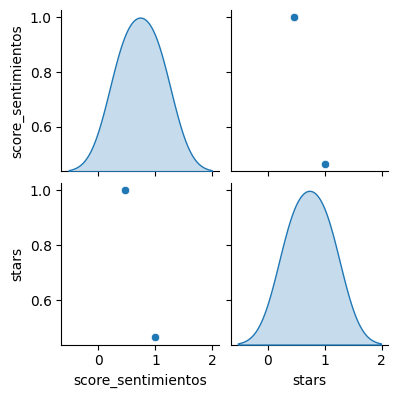

In [ ]:
# Seleccionar las columnas deseadas en una lista
columns = ['score_sentimientos','stars']
# Obtener el DataFrame con las columnas seleccionadas
selected_df = review[columns]

# Calcular la matriz de correlación
correlation_data = selected_df.corr()

# Crear el pairplot
sns.pairplot(correlation_data, diag_kind='kde', size=2)

4. Se utiliza heatmap de seaborn para observar la correlación en forma de mapa de calor con datos numéricos entre los datos cuantitativos.

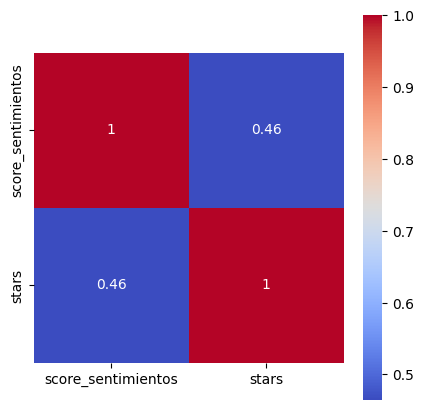

In [ ]:
# Se crea una figura con tamaño 5x5
plt.figure(figsize=(5,5))

# Se genera el mapa de calor con las correlaciones
sns.heatmap(selected_df.corr(), annot=True, square=True, cmap='coolwarm')

# Se genera la visualización del mapa de calor
plt.show()

5. Ponemos los valores negativos -1, neutros 0 y positivos en 1

In [ ]:
# Se agrega una columna para la categorización.
review['categorizacion'] = review['score_sentimientos'].apply(lambda x: 1 if x > 0 else -1)

In [ ]:
review.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,score_sentimientos,categorizacion
2400,VbF1PWIXGR-LNzh50aMlwQ,4_qLiAWJElV_pGrnfdnQEg,RNgb844JJbo6vO1iUod8vA,1.0,4,1,0,This place can not possibly be compared to Out...,2007-06-28 03:14:56,0.7568,1
3807,FN4Nrl6igWaXn0IrcJ3tKg,vEsl_mvbIYaWkdx2S6h2-A,gjFUrbSMo1rA1jgG5IhA2A,3.0,2,1,1,I managed to slip by just in time for the 2 fo...,2008-09-03 16:40:13,0.9233,1
3846,BedCmT13R6j18h-xJesqFw,a7Gve8KjkWC_1vPIEtOAKw,dsfRniRgfbDjC8os848B6A,5.0,3,0,3,Bern's is an amazing family-owned institution....,2008-02-13 07:48:11,0.9935,1
218,lVaNuwdCPqH9hguzKd8UCQ,TIUNy47Np73O6czmNuLg4Q,qDkbudGRfmJvf7trQZea4g,1.0,1,2,0,I love steak. I love steakhouses. I HATE RUT...,2008-04-02 00:26:20,-0.9764,-1
848,ThWYCDUv3uqPNJ6XYgPz-Q,G5xClPbVhpYguq17kCg1Qw,yqq1Fvt7WtduIO3GwjCP1Q,4.0,0,0,0,Sportsman's is one of Nashville's casual dinin...,2008-06-03 15:25:44,0.8658,1


6. Revisamos si se clasificó debidamente el texto

In [ ]:
review['text'][218]

"I love steak.  I love steakhouses.  I HATE RUTH CHRIS.\n\nFOOD: Total Crap.  They drench the filet mignon in BUTTER (read the menu) and then serve it to you.  They also drench all their vegetables (which are over-cooked) in butter.  They probably use more butter here than beef.\n\nSERVICE: Worse than the food.  Served me cold (not lukewarm, but COLD) soup and didn't even apologize.  Waited eternity for everything, including a spoon for my cold soup.  Servers, hosts, and management all acted as if they were doing me a huge favor by allowing ME to eat at THEIR crappy restaurant and were plain RUDE.  WTF?!?!\n\nAMBIANCE:  Dirty carpet.  Dingy-looking place.  Really loud.\n\nBy far, the worst steak house I have EVER been to.  I even went there a SECOND time, hoping my first experience was a fluke, but same thing.  Other Ruth Chris locations are not as bad, but still the worst of all the steakhouse chains.  YUCK!"

7. Contamos la cantidad de textos clasificados con los valores únicos

In [ ]:
# Contar la cantidad de valores de cada tipo
review['categorizacion'].value_counts()

 1    4147
-1     391
Name: categorizacion, dtype: int64

8. Observamos en un histograma la dispersión de los valores

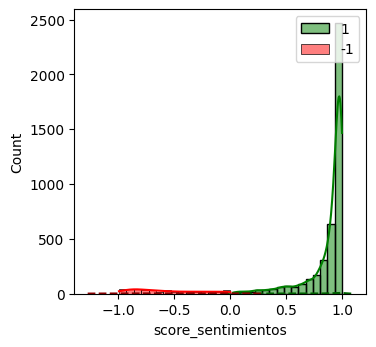

In [ ]:
# Se define el número de contenedores en los histogramas
bins = 15

# Se crea una figura con tamaño 10x10
plt.figure(figsize=(10, 10))

#Se crea un subgráfico para que se observen los histogramas
plt.subplot(3, 3, 1)

# Se utiliza hisplot de seaborn para graficar los histogramas por variable
sns.histplot(review[review['categorizacion'] == 0]['score_sentimientos'], bins=bins, color='yellow', label='0', kde=True)

# Se utiliza kdeplot de seaborn para trazar la distribución normal por variable
sns.kdeplot(review[review['categorizacion'] == 0]['score_sentimientos'], color='darkyellow', linestyle='--')

sns.histplot(review[review['categorizacion'] == 1]['score_sentimientos'], bins=bins, color='green', label='1', kde=True)
sns.kdeplot(review[review['categorizacion'] == 1]['score_sentimientos'], color='darkgreen', linestyle='--')

sns.histplot(review[review['categorizacion'] == -1]['score_sentimientos'], bins=bins, color='red', label='-1', kde=True)
sns.kdeplot(review[review['categorizacion'] == -1]['score_sentimientos'], color='darkred', linestyle='--')
# Muestra la leyenda
plt.legend(loc='upper right')

# Ajusta los subgrpaficos y los espacios para un mejor diseño
plt.tight_layout()

# Muestra el gráfico generado
plt.show()

9. Exportamos el archivo en formato CSV para ue pueda ser leído para el dashboard

In [ ]:
# Exporta el dataframe a un archivo CSV
review.to_excel("score.xlsx")

# Descarga el archivo CSV a tu computadora
from google.colab import files
files.download("score.xlsx")

## Modelo de regresión logística

1. Se definen la variables X e Y

In [ ]:
# X será la variable score_sentimientos del dataset
X=review.score_sentimientos

In [ ]:
# Y será la variable categorizacion que contiene:
# 1= buen comentario -- = -1mal comentario
y=review.categorizacion

2. Se instala la librería skitlearn para utilizar las regresiones

In [ ]:
!pip install scikit-learn

3. Se implementa la regresión logística desde sklearn

In [ ]:
## Implementamos la regresión logística
from sklearn.model_selection import train_test_split

4. Se separan los datos en "train" datos entrenados y "test" datos de prueba

In [ ]:
# Se usará el 20% de estos datos para la prueba
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

5. Se escalan los datos para que todos tengan la misma medida o magnitud.

In [ ]:
from sklearn.preprocessing import StandardScaler

escalar = StandardScaler()
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)


6. Se define el algoritmo a usar, en este caso por los tipos de datos en clasificación, se usará la REGRESIÓ LOGÍSTICA

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
algoritmo =LogisticRegression()

In [ ]:
# Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

7. Realizamos una predicción de los datos a prueba (estos siempre son aleatorios por default)

In [ ]:
y_pred=algoritmo.predict(X_test)

In [ ]:
# Se muestran los datos predichos
y_pred

array([-1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
        1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:
# Se muestran los datos reales
y_test

1678   -1
2365   -1
1865   -1
4180    1
4196    1
       ..
237     1
2589    1
1110    1
2362    1
1791    1
Name: categorizacion, Length: 908, dtype: int64

8. Se utiliziará la Matriz de confusión para evaluar y analizar el rendimiento de un modelo de clasificación al mostrar la concordancia entre las etiquetas de clase reales y las etiquetas de clase predichas.

In [ ]:
# Se importa la matriz confusión de sklearn
from sklearn.metrics import confusion_matrix

In [ ]:
matriz=confusion_matrix(y_test,y_pred)
print('Matriz de confusión:', matriz) # Solo se evalúa un 20% de los datos

Matriz de confusión: [[ 77   0]
 [  0 831]]


9. Se utiliza SVC de sklearn para saber las probabilidades de las clasificaciones de los datos según el modelo aplicado

In [ ]:
from sklearn.svm import SVC

In [ ]:
import numpy as np

In [ ]:
# Crear un estimador SVC
algoritmo2= SVC(probability=True)

# Ajustar el estimador a los datos de entrenamiento
algoritmo2.fit(X_train, y_train)

# Obtener las probabilidades de predicción para los datos de prueba
probas = algoritmo2.predict_proba(X_test)

print((np.round(probas,decimals=5)))

[[9.9998e-01 2.0000e-05]
 [9.9847e-01 1.5300e-03]
 [9.9593e-01 4.0700e-03]
 ...
 [0.0000e+00 1.0000e+00]
 [0.0000e+00 1.0000e+00]
 [0.0000e+00 1.0000e+00]]


10. Se usa GaussianNaiveBayes para que ausma una distribución normal para conocer la precisión de la predicción de las variables entrenadas y de prueba

In [ ]:
from sklearn.naive_bayes import GaussianNB

nbclf = GaussianNB().fit(X_train, y_train)
predicted = nbclf.predict(X_test)
print('Análisis de predicción de sentimientos de los comentarios')
print('Precisión del clasificador GaussianNB en el conjunto de entrenamiento: {:.2f}'.format(nbclf.score(X_train, y_train)))
print('Precisión del clasificador GaussianNB en el conjunto de prueba: {:.2f}'.format(nbclf.score(X_test, y_test)))

Análisis de predicción de sentimientos de los comentarios
Precisión del clasificador GaussianNB en el conjunto de entrenamiento: 0.98
Precisión del clasificador GaussianNB en el conjunto de prueba: 0.99


11. Se usa Metrics para evaluar y comparar el desempeño del modelo, en este caso, utilizaremos las del tipo clasificación por los tipos de datos

In [ ]:
from sklearn import metrics

print("Informe de clasificación para clasificador %s:\n%s\n"
      % (nbclf, metrics.classification_report(y_test, predicted)))

Informe de clasificación para clasificador GaussianNB():
              precision    recall  f1-score   support

          -1       0.89      1.00      0.94        77
           1       1.00      0.99      0.99       831

    accuracy                           0.99       908
   macro avg       0.94      0.99      0.97       908
weighted avg       0.99      0.99      0.99       908


